In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The purpose of this case study is to compare the accuracy on scaled and unsca

In [2]:
df=pd.read_csv('Advertising (1).csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


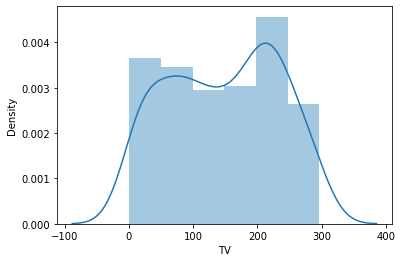

In [8]:
sns.distplot(df['TV'], kde='True')
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

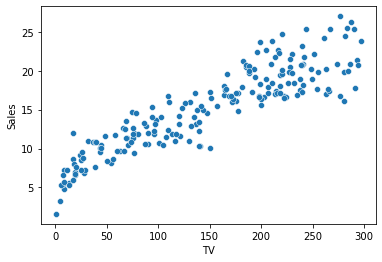

In [9]:
sns.scatterplot(x='TV', y='Sales', data=df)

In [10]:
#TV and Sales are positively corelated

In [11]:
list(df.columns)

['TV', 'Radio', 'Newspaper', 'Sales']

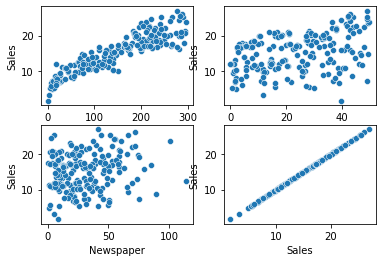

In [12]:
count=1
for i in list(df.columns):
    plt.subplot(2,2,count)
    sns.scatterplot(x=i, y='Sales', data= df)
    count=count+1

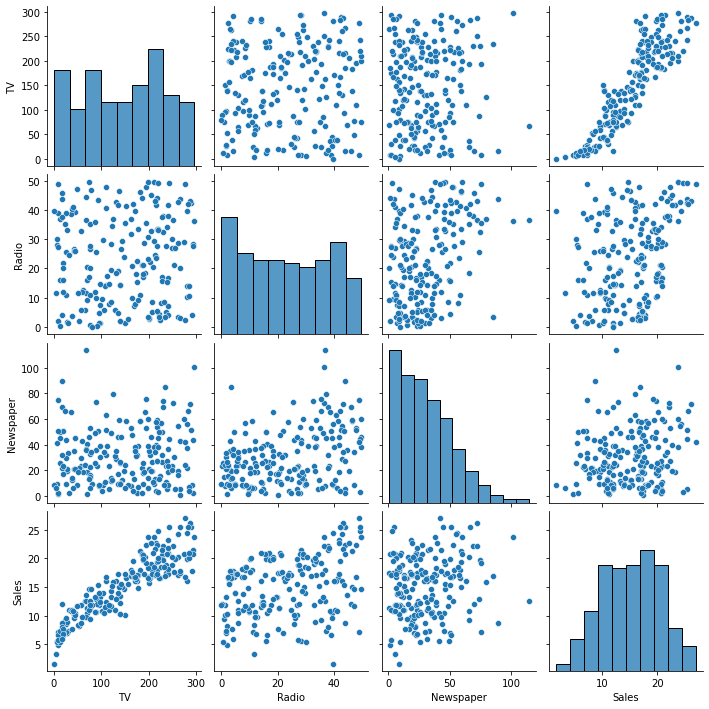

In [13]:
sns.pairplot(df)

<AxesSubplot:>

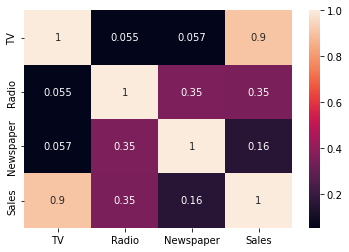

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
#dividing data
x=df[['TV']] #Featere
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [16]:
y=df['Sales'] #Target
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.2, random_state=123)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
xtrn=sc.fit_transform(xtrain)

In [22]:
xtst=sc.fit_transform(xtest)

# Model Building

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr1=LinearRegression()

In [26]:
lr.fit(xtrain,ytrain) # non scaled data

LinearRegression()

In [27]:
lr1.fit(xtrn,ytrain) #scaled data

LinearRegression()

In [28]:
y_train_pred=lr.predict(xtrain)

In [29]:
y_trn_pred=lr1.predict(xtrn)

In [30]:
y_test_pred=lr.predict(xtest)

In [31]:
y_tst_pred=lr1.predict(xtst)

# Model Evaluation

In [32]:
from sklearn.metrics import mean_squared_error,r2_score

In [33]:
print('train data Error ')
mse=print(np.sqrt(mean_squared_error(ytrain,y_train_pred)))

train data Error 
2.078358635602072


In [34]:
#scaled data
print('train scaled data Error')
mse=print(np.sqrt(mean_squared_error(ytrain,y_trn_pred)))

train scaled data Error
2.078358635602072


In [35]:
print('test data Error')
mse=print(np.sqrt(mean_squared_error(ytest,y_test_pred)))

test data Error
2.439135563454672


In [36]:
print('test scaled data Error')
mse=print(np.sqrt(mean_squared_error(ytest,y_tst_pred)))

test scaled data Error
2.752560832928436


In [37]:
print('scaled train R2 Score:- ', round(r2_score(ytrain,y_trn_pred),2))

scaled train R2 Score:-  0.84


In [38]:
print('train R2 Score:- ', round(r2_score(ytrain,y_train_pred),2))

train R2 Score:-  0.84


In [39]:
print('Test R2 Score:- ', round(r2_score(ytest,y_test_pred),2))

Test R2 Score:-  0.78


In [40]:
print('Scaled test R2 Score:- ', round(r2_score(ytest,y_tst_pred),2))

Scaled test R2 Score:-  0.73


### both scaled and unscaled data gives 84% accuracy on training but on testing it differs.